In [41]:
from solvers import implicit_scheme
from utils import brownian_paths, cir_bond_price, price_derivative, estimate_order, plot_distribution
import matplotlib.pyplot as plt
import numpy as np

# Simulating Paths

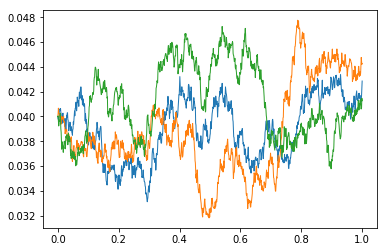

In [50]:
T = 1
N = 10000
num_paths = 3

k = 1
lamda = 0.04
theta = 0.06
X_0 = 0.04
t, W = brownian_paths(1, 1000, num_paths) # Generate Wiener process
t, X = implicit_scheme(k, lamda, theta, X_0, t, W) # Use implicit scheme to generate CIR path
plt.plot(t, X, linewidth=1)
plt.show()

# Price of bond

In [19]:
cir_bond_price(k, lamda, theta, 0, T) # Analytic value

0.9853953407078493

Monte Carlo Approach using implicit method

In [51]:
def payoff(x):
    return 1
price_derivative(k, lamda, theta, 0, T, N, 10000, payoff)
# returns 95% confidence interval

(0.9853506281982162, 0.9853042848619094, 0.985396971534523)

# Estimate order of convergence

Uses method from Alfonsi (2005)

In [38]:
estimate_order(k, lamda, theta, X_0, implicit_scheme, T, 1000, 1000)[0]
# implicit scheme has order of convergence near one when feller's condition holds

0.998513831952148

# Plot Distribution

To show that the implicit method converges to the chi-squared distribution as step size is increased. Black dotted line shows end time distribution based on the known chi-squared distribution of CIR

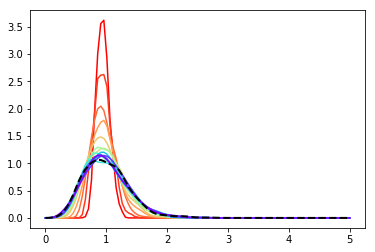

In [46]:
k = 1
lamda = 1
theta = 0.5
X_0 = 1
T = 20
N = 10000
M = 1000
plot_distribution(k, lamda, theta, X_0, implicit_scheme, T, 2**np.arange(0, 15), M)